# Exploratory Data Analysis
**Obiettivo**: Analizzare il dataset Global Cybersecurity Threats 2015-2024

### **1. Analisi Geografica**

**Q1**: Quali sono i 5 paesi più colpiti nel dataset?
- **KPI**: Conteggio attacchi per Country (top 5)

**Q2**: Quale paese ha subito le perdite finanziarie totali maggiori?
- **KPI**: Somma Financial Loss per Country

**Q3**: Esiste differenza tra paesi sviluppati (USA, UK, Germany) e emergenti (India, Brazil, China)?
- **KPI**: Loss medio per gruppo di paesi

---

### **2. Analisi Settoriale**

**Q4**: Quali sono i 3 settori più attaccati?
- **KPI**: Frequenza per Target Industry

**Q5**: Quale settore ha le perdite medie più alte?
- **KPI**: Media Financial Loss per settore

**Q6**: Banking e Healthcare sono più colpiti da Ransomware?
- **KPI**: Crosstab Target Industry × Attack Type

---

### **3. Analisi Temporale**

**Q7**: Il numero di attacchi è cresciuto dal 2015 al 2024?
- **KPI**: Conteggio attacchi per Year + trend

**Q8**: Quale anno ha registrato il picco di attacchi?
- **KPI**: Anno con max attacchi

**Q9**: Le perdite finanziarie medie sono aumentate nel tempo?
- **KPI**: Media Financial Loss per Year

---

### **4. Analisi Tipi di Attacco**

**Q10**: Quali sono i 3 tipi di attacco più frequenti?
- **KPI**: Top 3 Attack Type per frequenza

**Q11**: Ransomware causa più danni di Phishing?
- **KPI**: Media Financial Loss per Attack Type

**Q12**: Quale attacco impatta più utenti in media?
- **KPI**: Media Affected Users per Attack Type

---

### **5. Analisi Vulnerabilità**

**Q13**: Qual è la vulnerabilità più sfruttata?
- **KPI**: Top Security Vulnerability Type

**Q14**: "Weak Passwords" causa più danni di "Unpatched Software"?
- **KPI**: Media Financial Loss per Vulnerability Type

**Q15**: Quale Attack Source è più pericoloso (Nation-state vs Hacker Group vs Insider)?
- **KPI**: Distribuzione Attack Source + loss medio

---

### **6. Analisi Difese**

**Q16**: Qual è il meccanismo di difesa più utilizzato?
- **KPI**: Top Defense Mechanism Used

**Q17**: AI-based Detection riduce il tempo di risoluzione?
- **KPI**: Media Resolution Time per Defense Mechanism

**Q18**: Firewall vs VPN vs Encryption: quale è più efficace?
- **KPI**: Loss medio e Resolution Time per difesa

---

### **7. Analisi Impatto**

**Q19**: Qual è la distribuzione delle perdite finanziarie?
- **KPI**: Min, Q1, Median, Q3, Max, Mean di Financial Loss

**Q20**: Quanti attacchi hanno causato perdite > $80M?
- **KPI**: Conteggio outliers (es. loss > P90)

**Q21**: Qual è il tempo medio di risoluzione degli incidenti?
- **KPI**: Media, Mediana, Max Resolution Time

---

### **8. Analisi Correlazioni**

**Q22**: Esiste correlazione tra Financial Loss e Affected Users?
- **KPI**: Correlation coefficient

**Q23**: Attacchi con più utenti impattati richiedono più tempo per risolversi?
- **KPI**: Correlazione Affected Users × Resolution Time

**Q24**: Zero-day vulnerabilities causano più danni?
- **KPI**: Confronto loss medio Zero-day vs altri

In [10]:
# Dependency imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

# Configurazione visualizzazioni
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## Dataset Loading

In [11]:
# Load dataset
df = pd.read_csv('../data/earthquake_data_tsunami.csv')

## Dataset Overview

In [12]:
# Display first few rows of the dataset
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [13]:
# Display last few rows of the dataset
df.tail()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
777,7.7,0,8,912,427,0.0,0.0,60.0,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.0,0.0,36.4,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.0,0.0,103.0,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.0,0.0,33.0,6.6310,126.899,2001,1,0
781,7.5,0,7,865,324,0.0,0.0,33.0,6.8980,126.579,2001,1,0


## Dataset Understanding

In [14]:
# Dataset information
print(f"Dataset shape: {df.shape}\n")
df.info()

Dataset shape: (782, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [15]:
# Numerical feature summary
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


## Dataset Analysis

In [16]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


# Numero di terremoti per anno

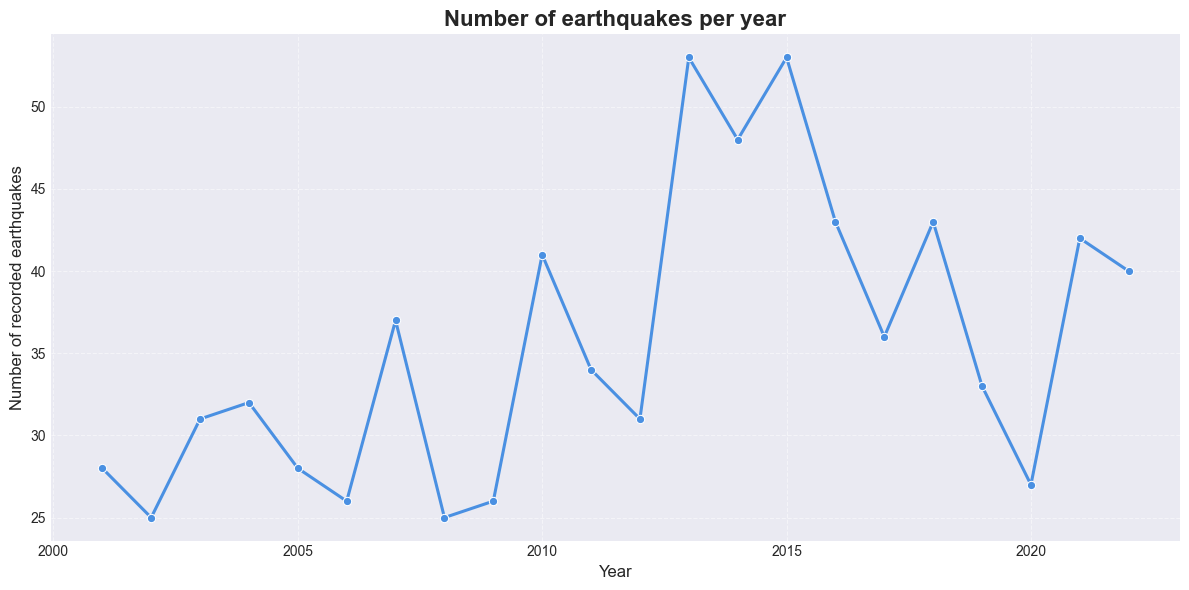

In [20]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
events_per_year = df.groupby('Year').size().reset_index(name='Count')

# Remove any null or out-of-range years (e.g. missing or 0 values)
events_per_year = events_per_year.dropna()
events_per_year = events_per_year[events_per_year['Year'] > 0]

# Grafico
plt.figure(figsize=(12,6))
sns.lineplot(
    data=events_per_year, 
    x='Year', y='Count', 
    marker='o', linewidth=2.2, color='#4A90E2'
)

plt.title("Number of earthquakes per year", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of recorded earthquakes", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Quanti terremoti hanno generato tsunami

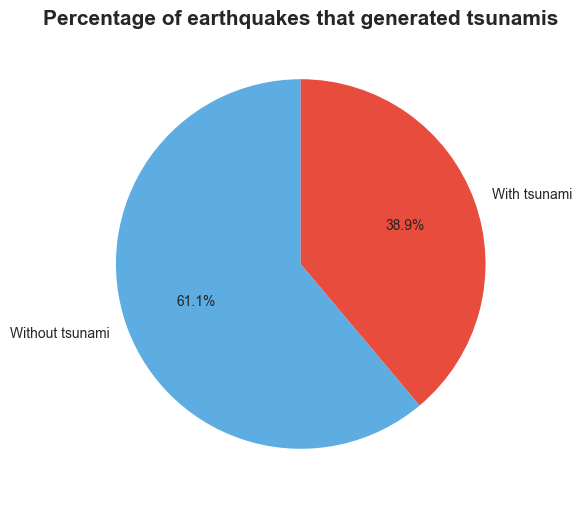

In [51]:
tsunami_counts = df['tsunami'].value_counts().reset_index()
tsunami_counts.columns = ['tsunami', 'Count']

labels_map = {0: 'Without tsunami', 1: 'With tsunami'}
tsunami_counts['tsunami'] = tsunami_counts['tsunami'].map(labels_map)

plt.figure(figsize=(6,6))
plt.pie(
    tsunami_counts['Count'], 
    labels=tsunami_counts['tsunami'], 
    autopct='%1.1f%%', 
    startangle=90, 
   colors = ['#5DADE2', '#E74C3C']
)
plt.title("Percentage of earthquakes that generated tsunamis", fontsize=15, weight='bold')
plt.show()

# Distribuzione geografica dei terremoti (quei terremoti che generano tsunami di un colore diverso)

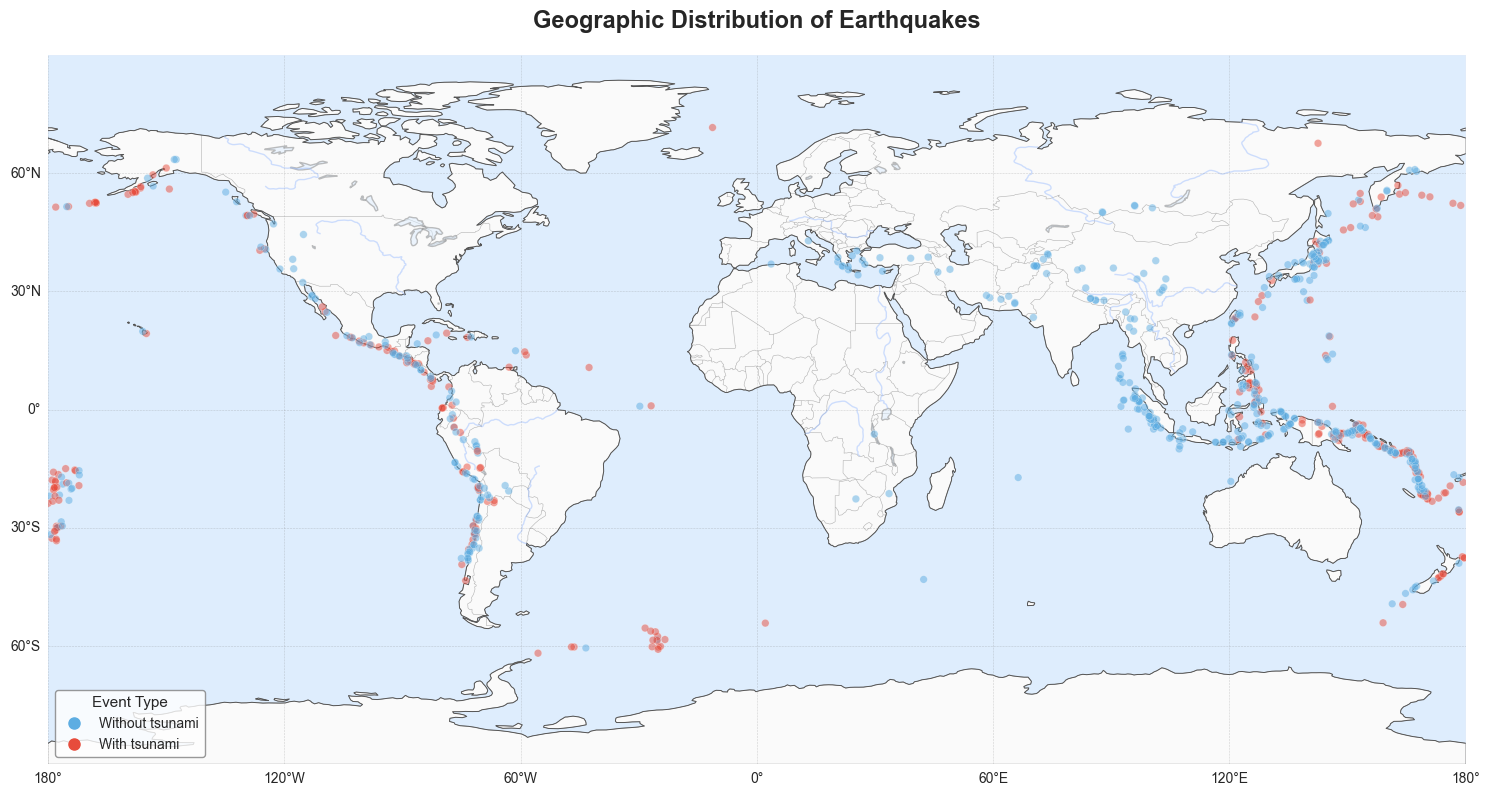

In [52]:

df = df.dropna(subset=['latitude', 'longitude', 'tsunami'])
df['tsunami'] = df['tsunami'].astype(int)


fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()


ax.add_feature(cfeature.OCEAN, facecolor='#DDEEFF', alpha=0.9)
ax.add_feature(cfeature.LAND, facecolor='#FAFAFA', edgecolor='gray', linewidth=0.3)
ax.add_feature(cfeature.BORDERS, linewidth=0.4, edgecolor='gray', alpha=0.6)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7, edgecolor='#555')
ax.add_feature(cfeature.LAKES, facecolor='#DDEEFF', edgecolor='gray', alpha=0.5)
ax.add_feature(cfeature.RIVERS, edgecolor='#A0C0FF', alpha=0.5)

gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.35, linestyle='--')
gl.top_labels = False
gl.right_labels = False


color_map = {0: '#5DADE2', 1: '#E74C3C'}
df['color'] = df['tsunami'].map(color_map)


ax.scatter(
    df['longitude'], df['latitude'],
    c=df['color'],
    s=30,                     
    alpha=0.5,                
    edgecolor='white',        
    linewidth=0.3,
    transform=ccrs.PlateCarree(),
    zorder=3
)


handles = [
    plt.Line2D([], [], color='#5DADE2', marker='o', linestyle='', markersize=8, label='Without tsunami'),
    plt.Line2D([], [], color='#E74C3C', marker='o', linestyle='', markersize=8, label='With tsunami')
]
plt.legend(
    handles=handles,
    title="Event Type",
    loc='lower left',
    frameon=True,
    facecolor='white',
    edgecolor='gray',
    fontsize=10,
    title_fontsize=11
)


plt.title("Geographic Distribution of Earthquakes", fontsize=17, weight='bold', pad=20)
plt.tight_layout()

plt.show()

## Depth-Magnitude Correlation

<Axes: xlabel='depth', ylabel='magnitude'>

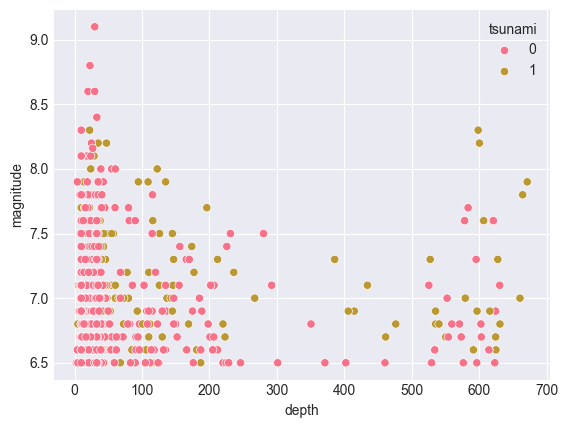

In [44]:
sns.scatterplot(data=df, x='depth', y='magnitude', hue='tsunami', alpha=1)

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

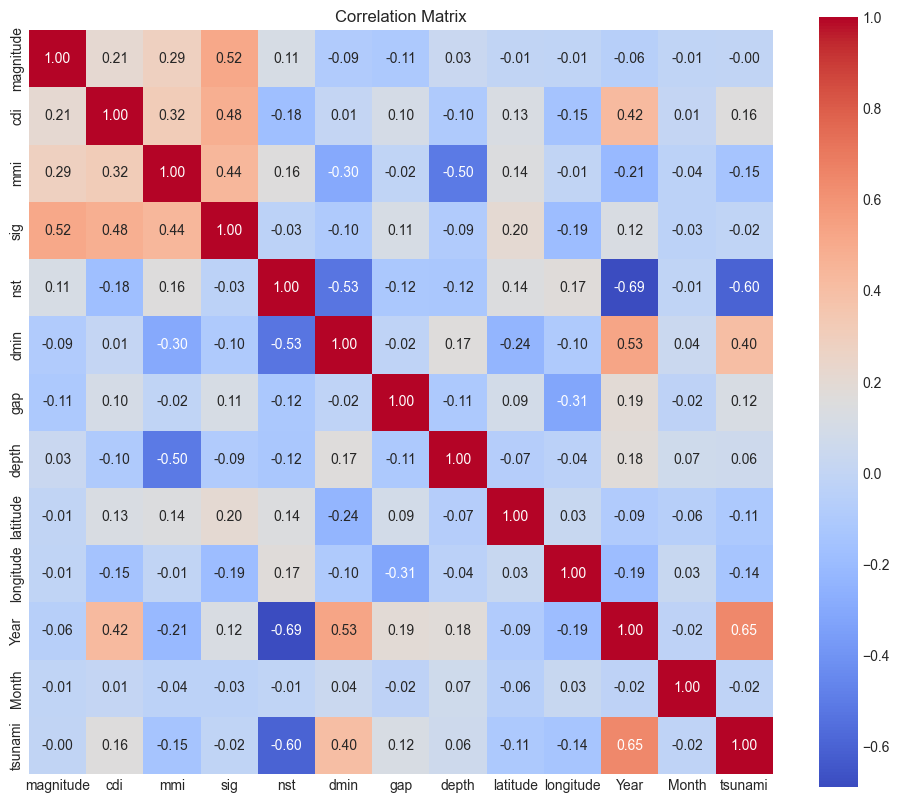

In [43]:
corr_matric = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matric, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

## Outlier Analysis

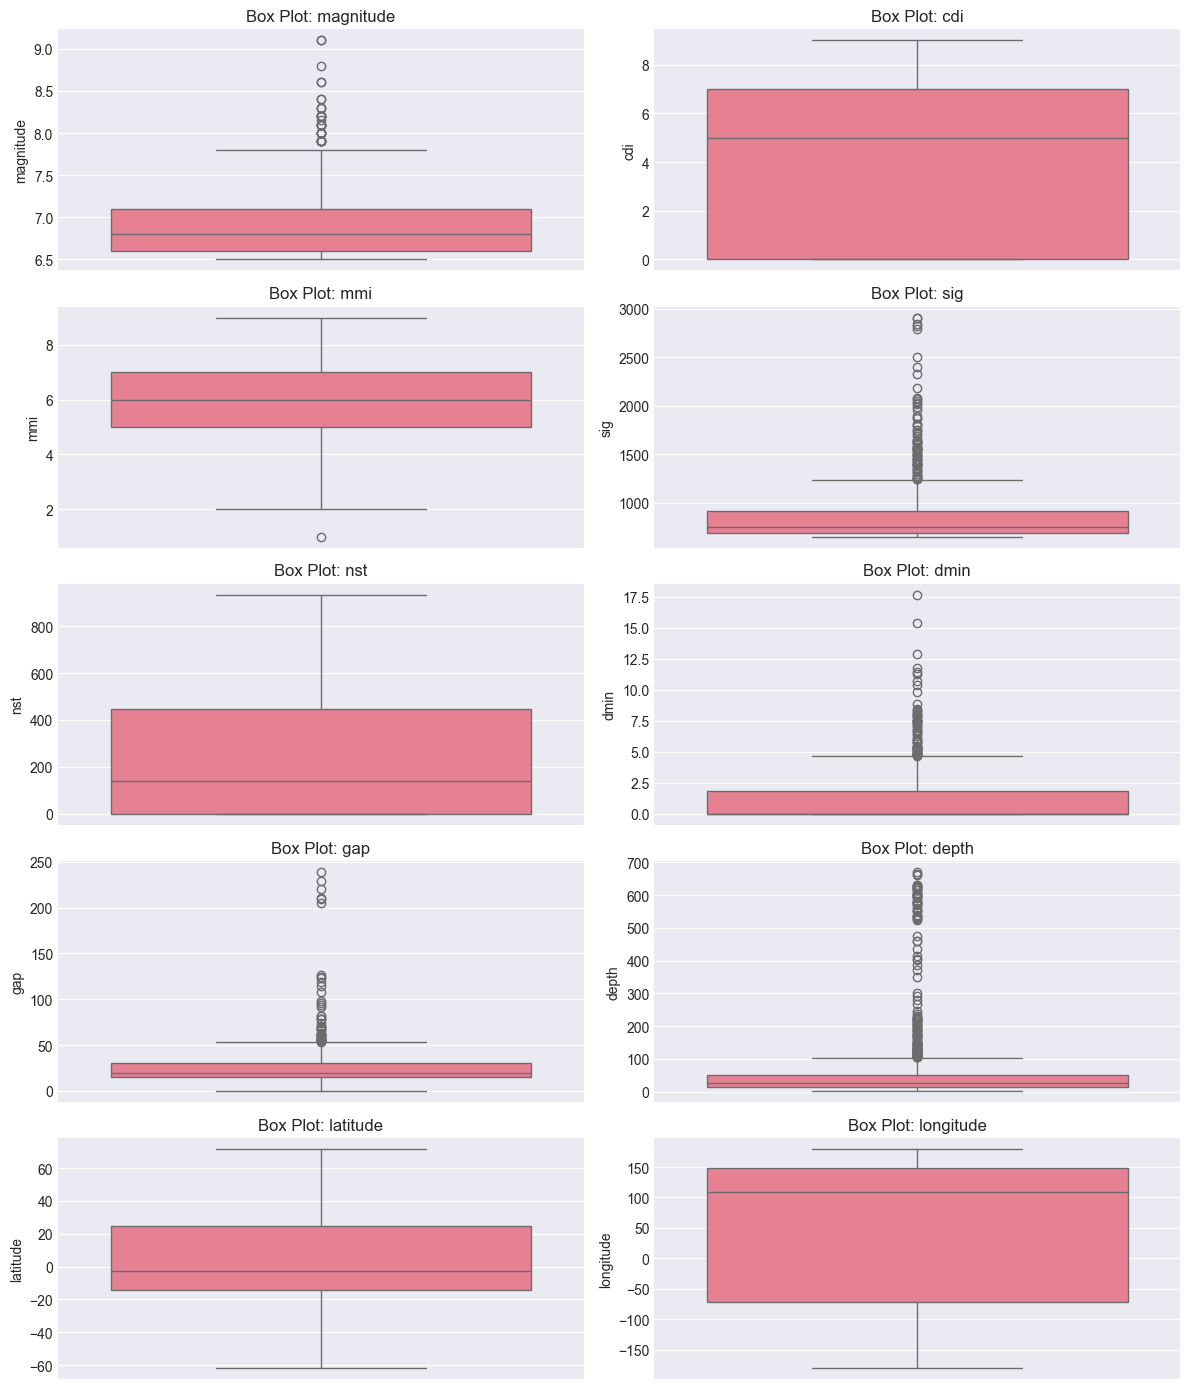

In [47]:
# Select numerical features excluding tsunami, Year, and Month
numerical_features = df.select_dtypes(include=[np.number]).columns.drop([
    'tsunami', 'Year', 'Month'])

# Create box plots for outlier analysis
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()